In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_compare(*args, title=None, cmap='viridis'):
    L = len(args)

    if (L == 0): return None
    
    if (L == 1):
        f = plt.figure(figsize=(20,20))
        plt.imshow(args[0], cmap=cmap)
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(30,30))
        for i, ax in enumerate(axs):
            ax.imshow(args[i], cmap=cmap)
            ax.axis('off')

    if (title is not None):
        plt.title(title)
    plt.show()
    
    return f 

In [3]:
def convolve_channel(channel, FILTER):
    N = len(FILTER)

    view_shape = tuple(np.subtract(channel.shape, (N,N)) + 1) + (N, N)
    strides = channel.strides + channel.strides
    sub_matrices = np.lib.stride_tricks.as_strided(channel,view_shape,strides)
    filtered = np.einsum('ij,klij',FILTER,sub_matrices)
    result = filtered
    
    return result

def convolve_filter(image, FILTER):
    has_color = (len(image.shape) == 3)

    channels = np.transpose(image, axes=[2, 0, 1]) if has_color else [image]
    result = [convolve_channel(channel, FILTER) for channel in channels] 
    transposed = np.transpose(np.array(result), axes=[1, 2, 0]) if has_color else result[0]
    
    return transposed

### Item 8

Usando a função da questão 1, crie funções que apliquem filtros para calcular as imagens representando ∂f/∂x, ∂f/∂y e |∇f|. Em seguida, implemente o operador de Sobel usando estas imagens como entrada. Exiba cada um desses resultados para três imagens distintas.

#### Filters

In [4]:
G_X = np.array([[ 1, 0,-1],
                [ 2, 0,-2],
                [ 1, 0,-1]])

G_Y = np.array([[ 1, 2, 1],
                [ 0, 0, 0],
                [-1,-2,-1]])

#### Building

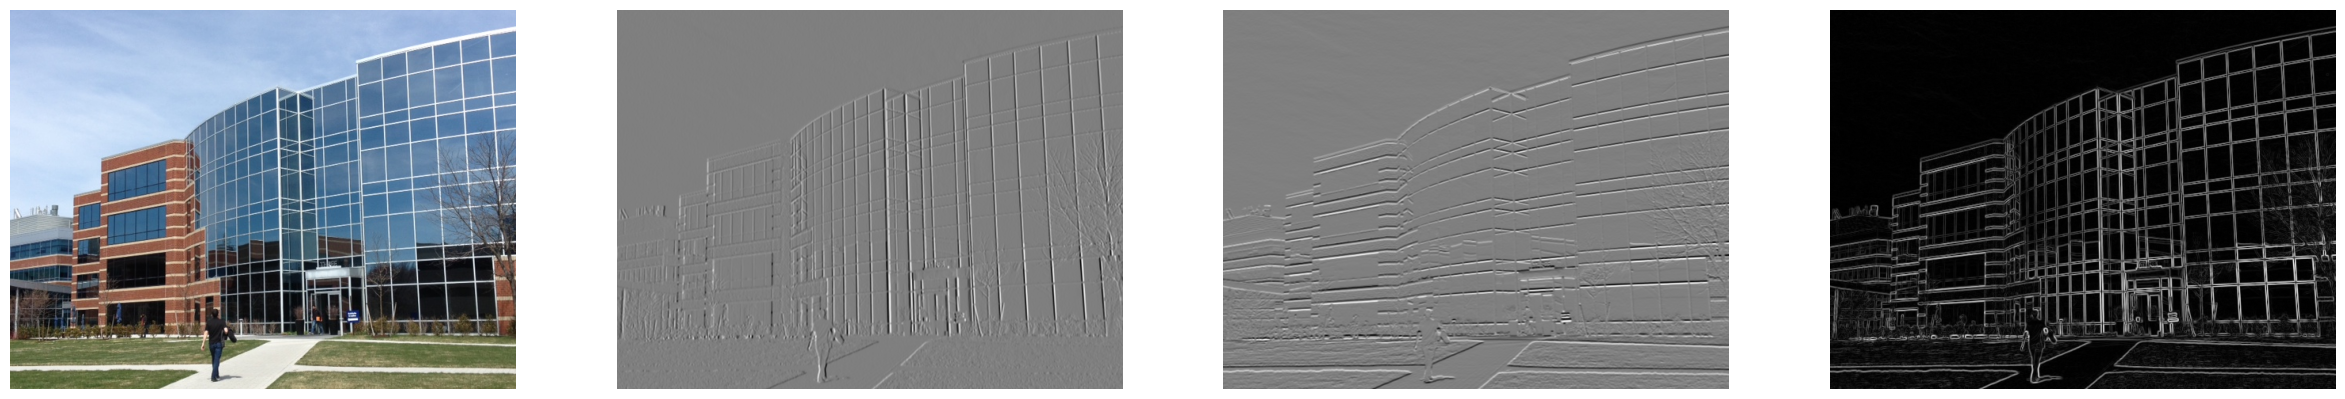

In [5]:
IMAGE = "building"

original = cv2.cvtColor(cv2.imread(f"./images/{IMAGE}.jpg"), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

gradient_x = convolve_filter(gray, G_X)
gradient_y = convolve_filter(gray, G_Y)

gradient_magnitude = np.sqrt((gradient_x**2) + (gradient_y**2))
cv2.imwrite(f"./results/{IMAGE}_magnitude.jpg", gradient_magnitude)

result = plot_compare(original, gradient_x, gradient_y, gradient_magnitude, cmap="gray")
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

#### Square

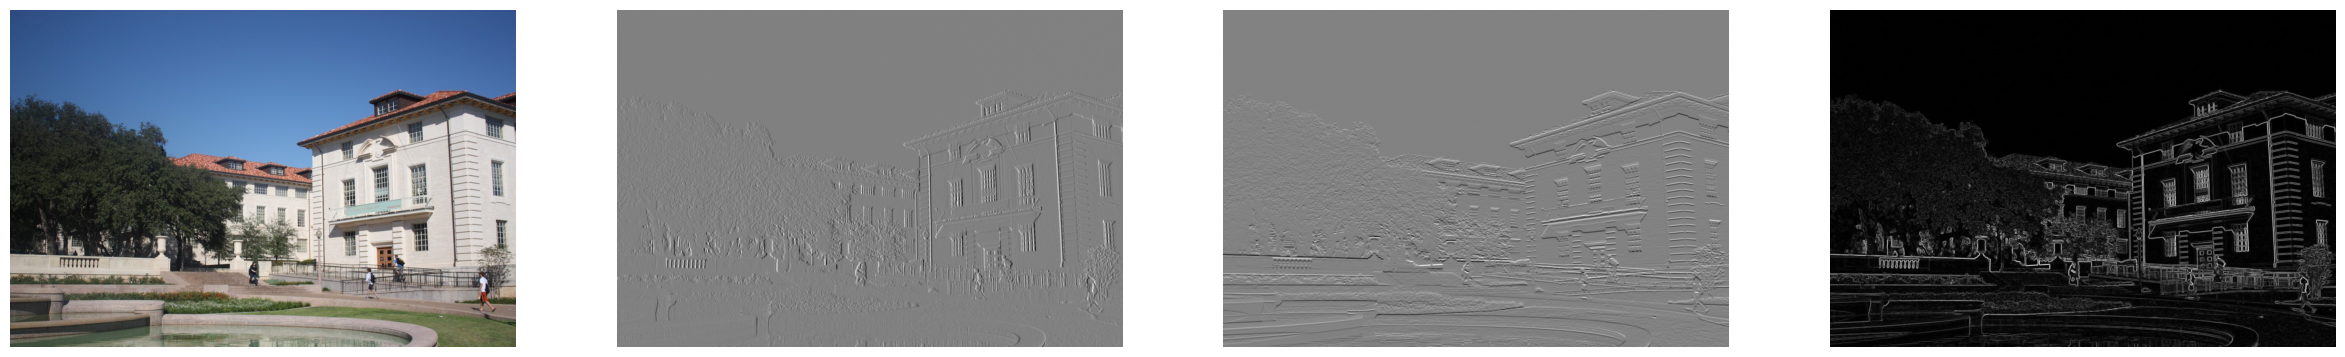

In [6]:
IMAGE = "square"

original = cv2.cvtColor(cv2.imread(f"./images/{IMAGE}.jpg"), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

gradient_x = convolve_filter(gray, G_X)
gradient_y = convolve_filter(gray, G_Y)

gradient_magnitude = np.sqrt((gradient_x**2) + (gradient_y**2))
cv2.imwrite(f"./results/{IMAGE}_magnitude.jpg", gradient_magnitude)

result = plot_compare(original, gradient_x, gradient_y, gradient_magnitude, cmap="gray")
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

#### Street

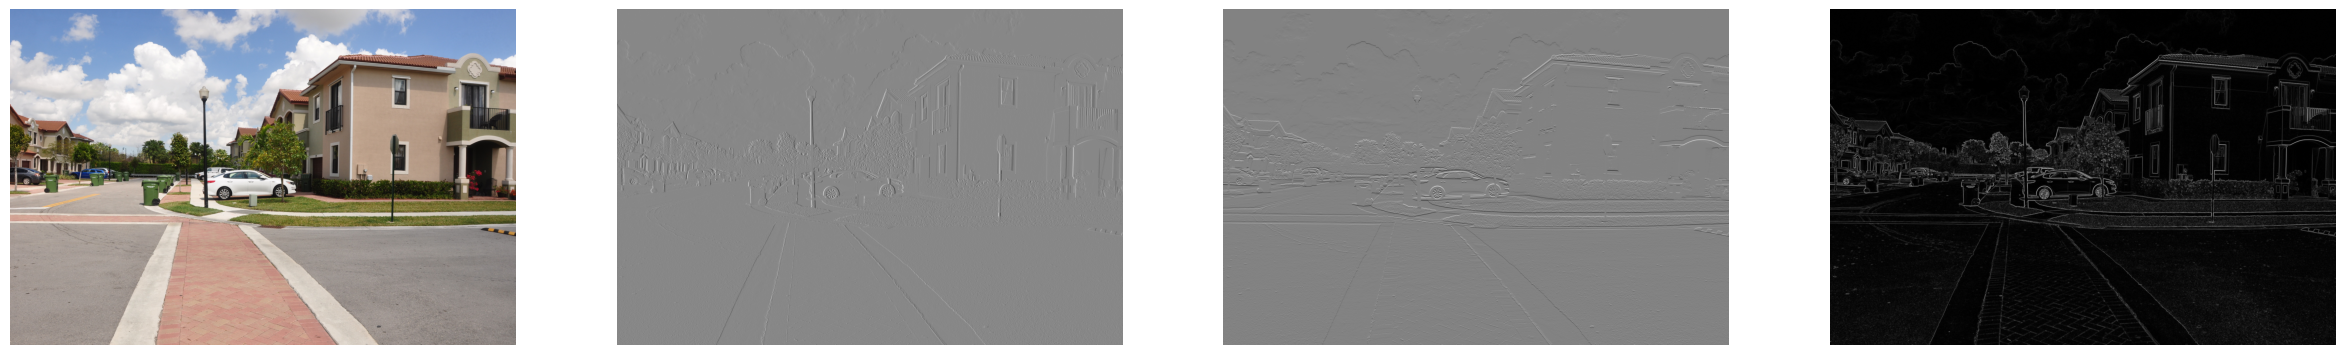

In [7]:
IMAGE = "street"

original = cv2.cvtColor(cv2.imread(f"./images/{IMAGE}.jpg"), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

gradient_x = convolve_filter(gray, G_X)
gradient_y = convolve_filter(gray, G_Y)

gradient_magnitude = np.sqrt((gradient_x**2) + (gradient_y**2))
cv2.imwrite(f"./results/{IMAGE}_magnitude.jpg", gradient_magnitude)

result = plot_compare(original, gradient_x, gradient_y, gradient_magnitude, cmap="gray")
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)